In [31]:
from utils import get_dataframes

dataframes, effect_data = get_dataframes("", True, False)

In [32]:
characters_liking = dataframes["characters"].loc[:, ["name", "likes", "dislikes"]]
df = characters_liking[characters_liking["likes"].str.len() != 0].reset_index(drop=True)

In [33]:
def parse_and_flatten_list(list_str: list[list[str]]):
    """
    Convert string like '[[Plüschtiere], [Alleinsein], ...]'
    into a Python list ['Plüschtiere','Alleinsein',...]
    """
    string_list: list[str] = []
    try:
        for sub in list_str:
            string_list.append(sub[0])
        return string_list
    except Exception as e:
        print("An exception occurred:", e)
        return []


df["likes"] = df["likes"].apply(parse_and_flatten_list)
df["dislikes"] = df["dislikes"].apply(parse_and_flatten_list)
df

,name,likes,dislikes
0,Amlin,"[Plüschtiere, Alleinsein, Ordnung, Kontrolle, Geschichte, Nebel, Tee, Nacht, Katzen]","[Faule Personen, Emotionale Personen, Festivitäten, Insekten]"
1,Ar-Merer,"[Gerichtsprozesse, Gewinnen, Aufmerksamkeit seiner Mutter, Macht]","[Gruppenarbeiten, Unrecht haben, Familie, Widerworte]"
2,Avila,"[Pärchen beobachten, Flauschige Tiere, Kamillentee, Rosen, Harmonie, Freunden eine Freude machen]","[Streit, Pöbelnde Personen]"
3,Burdig,"[Apfelwein, Karl, Gute Gespräche mit Kunden, Festivitäten, Hackbraten, Seine Taverne, Freundschaften schließen]","[Voreingenommene Personen, Schmarotzer, Aufdringliche Personen]"
4,Carmesine,"[Glaube, Kräutertee, Katzen, Ruhe]","[Unordnung, Unruhe, Insekten, Spät aufstehen]"
5,Cordelia,"[Ehre, Stärke beweisen, Ausritte zu Pferd, Hagebuttentee, Ritter, Epische Schlachten, Heldengeschichten, Jervar beschützen, Geschichtsbücher]","[Krieg, Saufgelage, Deserteure]"
6,Fubuki,"[Süßigkeiten, Süßspeisen, Große Klingenwaffen, Winter, Tiere, Glühwein, Kuscheln]","[Hitze, Bitteres Essen, Wie ein Kind behandelt werden, Gespenster, Viele Personen, Böse Personen]"
7,Grenze,"[Stärke, Mut, Duelle, Kontrolle, Anerkennung]","[Menschen, Schwächlinge, Übermut, Erinnerungen an früher]"
8,Hindrik,"[Holz, Regen, Wald, Natur, Selbstständigkeit, Kochen, Minimalismus]","[Menschenmengen, Tiere schlachten, Holzsplitter, Adlige, Fisch]"
9,Iddra,"[Geld, Katzen, Orangen, Macht, Untergebene, Rotwein, Weiblichkeit, Parfüm, Strohblumen]","[Ungehorsamkeit, Widerworte, Arroganz, Unsauberkeit, Putzen]"


In [34]:
all_items = set()
for _, row in df.iterrows():
    for i in row["likes"]:
        all_items.add(i)
    for i in row["dislikes"]:
        all_items.add(i)

all_items = list(all_items)
print(f"Found {len(all_items)} unique items.")

Found 191 unique items.


In [35]:
import spacy

nlp = spacy.load("de_core_news_lg")

item_vectors = []
for item in all_items:
    doc = nlp(item)
    item_vectors.append(doc.vector)

import numpy as np

item_vectors = np.array(item_vectors)
print("Vectors shape:", item_vectors.shape)

Vectors shape: (191, 300)


In [36]:
from sklearn.cluster import KMeans

k = 15  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(item_vectors)

# kmeans.labels_ is an array of cluster assignments for each item
labels = kmeans.labels_

In [37]:
clusters = {}
for cluster_id in range(k):
    clusters[cluster_id] = []

for item_idx, cluster_id in enumerate(labels):
    clusters[cluster_id].append(all_items[item_idx])

for cluster_id, items_in_cluster in clusters.items():
    print(f"Cluster {cluster_id}: {items_in_cluster}")
    print("---------")


Cluster 0: ['Unrecht haben', 'Imbissbudengerichte', 'Unsauberkeit', 'Plüschtiere', 'Süße Dinge', 'Bärenfleisch', 'Wie ein Kind behandelt werden', 'Ungepflegte Leute', 'Ungehorsamkeit', 'Kuscheln', 'Feiern in Bekanntenkreisen', 'Schmarotzer', 'Intriganz', 'Mode', 'Spinnenlilien', 'Blinder Gehorsam', 'Lästereien', 'U-Ranos', 'Spontanität', 'Monster', 'Wortwitze', 'Angeln', 'Übermut', 'Jervar beschützen', 'Hackbraten', 'Strohblumen', 'Deserteure', 'Gefühlsmaskerade', 'Durch Rang erzwungener Respekt', 'Adlige', 'Ihre Mutter', 'Schwächlinge', 'Seine Taverne', 'Haushaltsarbeit', 'Freiluftbäder', 'Nähen', 'Prunkvolle Gebäude', 'Nachmittagsteerunden', 'Hortensien', 'Holzsplitter', 'Schlechte Witze', 'Arroganz', 'Spät aufstehen', 'Enge Räume', 'Höfisches Benehmen', 'Minimalismus', 'Sticheln', 'Schlechte Laune', 'Widerworte', 'Alkoholiker', 'Alleinsein', 'Sich blamieren', 'Große Klingenwaffen', 'Gerstentee', 'Karl', 'Narben', 'Gespenster', 'Raucher', 'Saufgelage']
---------
Cluster 1: ['Nebel', 

In [38]:
def build_cluster_vector(likes, dislikes, item_to_cluster, num_clusters):
    """
    item_to_cluster: dict mapping item string -> cluster_id
    returns a length `num_clusters` vector with +counts and -counts
    """
    vec = np.zeros(num_clusters, dtype=int)

    for l in likes:
        c = item_to_cluster.get(l, None)
        if c is not None:
            vec[c] += 1

    for d in dislikes:
        c = item_to_cluster.get(d, None)
        if c is not None:
            vec[c] -= 1

    return vec


# Build a dict item -> cluster_id
item_to_cluster = {}
for idx, item in enumerate(all_items):
    cluster_id = labels[idx]
    item_to_cluster[item] = cluster_id

# Now create a vector for each character
character_cluster_vectors = {}
for _, row in df.iterrows():
    name = row["name"]
    likes = row["likes"]
    dislikes = row["dislikes"]
    c_vec = build_cluster_vector(likes, dislikes, item_to_cluster, k)
    character_cluster_vectors[name] = c_vec

# Show an example
for name, vec in character_cluster_vectors.items():
    print(f"{name}: {vec}")


Amlin: [ 2  2  0 -2  1  0  2  0  0  0  0  0  0  0  0]
Ar-Merer: [-2  0  0  0  0  1  1  0  0  0  0  0  0  0  0]
Avila: [ 0  1  1 -1  1  2  0  0  0  0  0  0  0  0  0]
Burdig: [ 2  0  0 -2  1  3  0  0  0  0  0  0  0  0  0]
Carmesine: [-1  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
Cordelia: [-1  1  1  0  1  3  0  0  0  0  0  0  0  1  0]
Fubuki: [ 0  1  1 -2  2  1  0 -1  0  0  0 -1  0  0  0]
Grenze: [-2  0  0 -1  0  0  3  0  0  0  0  0  0  0  1]
Hindrik: [-1  1 -1 -1 -1  0  1  1  1  1  1  0  0  0  0]
Iddra: [-3  0  1  0  3  1  2 -1  0  0  0  0  1  0  0]
Justicia: [0 0 0 0 0 0 1 0 0 1 0 0 0 2 0]
Kaen: [-1 -1 -1  0  0  1  0  1  0  0  0  0  0  0  0]
Karl: [ 1 -1  0  0  1  2 -1 -1  0  0  0  0  0  1  0]
Meilira: [ 1  0  0 -1  0  2  0  0  0  0  0  0  0 -1  0]
Nerissa: [ 0  2  2 -1  1 -1  1  0  0  0  0  0  0  1  0]
Rai: [-1  0 -1  0 -1  2  1  1  0  0  1  0  0  1  1]
Scarlet: [-1  1  0  0  2  1  0  1  0  0  0 -1  0  0  0]
Selen: [-2  0  1 -2  0  0 -1  0  0  0  0  0  0  1  0]
Spitze: [1 1 0 0 0 0 0 

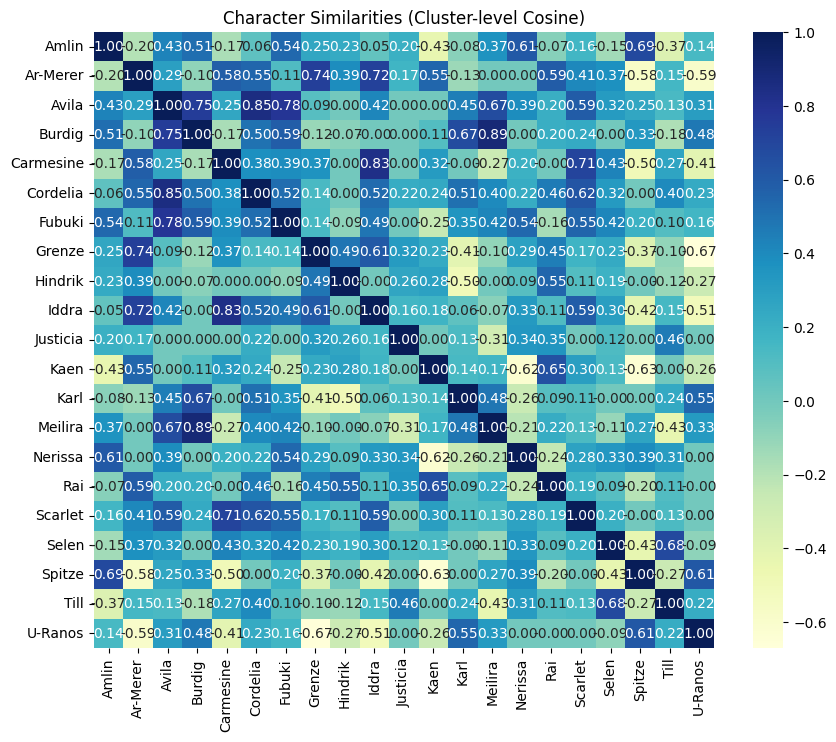

In [39]:
from sklearn.metrics.pairwise import cosine_similarity

names = list(character_cluster_vectors.keys())
vecs = np.array([character_cluster_vectors[n] for n in names])

similarity_matrix = cosine_similarity(vecs)

# Now similarity_matrix[i, j] is the similarity between character i and j
# We can show this in a nice heatmap with Seaborn:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix,
            xticklabels=names,
            yticklabels=names,
            cmap="YlGnBu",
            annot=True,
            fmt=".2f")
plt.title("Character Similarities (Cluster-level Cosine)")
plt.show()


In [40]:
def character_similarity(char1, char2):
    vec1 = character_cluster_vectors[char1].reshape(1, -1)
    vec2 = character_cluster_vectors[char2].reshape(1, -1)
    return cosine_similarity(vec1, vec2)[0, 0]


selected_characters = ("Selen", "Scarlet")
print(f"Similarity between {selected_characters[0]} and {selected_characters[1]}:",
      character_similarity(*selected_characters))


Similarity between Selen and Scarlet: 0.20100756305184242


In [41]:
import numpy as np


def find_most_similar_and_different(target_char, similarity_matrix, names):
    """
    Returns the most similar and the most different character relative to `target_char`,
    based on the provided similarity matrix, ignoring self-comparison.

    :param target_char: Name of the character (string).
    :param similarity_matrix: NxN numpy array of similarity scores.
    :param names: List of character names in the same order as similarity_matrix.
    :return: A tuple (most_similar_name, most_similar_value, most_different_name, most_different_value)
    """
    if target_char not in names:
        raise ValueError(f"{target_char} is not in the list of names.")

    # Find the row index for our target character
    idx = names.index(target_char)
    # Copy the row so we can safely modify it without messing up the original matrix
    sims_copy = similarity_matrix[idx, :].copy()

    # Set the self-similarity to NaN so it won't affect min/max computations
    sims_copy[idx] = float('nan')

    # np.nanargmax / np.nanargmin will ignore NaN entries
    max_idx = np.nanargmax(sims_copy)  # index of highest similarity
    min_idx = np.nanargmin(sims_copy)  # index of lowest similarity

    most_similar_char = names[max_idx]
    most_different_char = names[min_idx]

    max_val = sims_copy[max_idx]  # highest similarity score
    min_val = sims_copy[min_idx]  # lowest similarity score

    return most_similar_char, max_val, most_different_char, min_val


In [42]:
some_char = "Amlin"
most_sim_char, max_val, most_diff_char, min_val = find_most_similar_and_different(
    some_char, similarity_matrix, names
)
print(f"\nFor {some_char}:")
print(f" - Most similar: {most_sim_char} (similarity={max_val:.2f})")
print(f" - Most different: {most_diff_char} (similarity={min_val:.2f})")


For Amlin:
 - Most similar: Spitze (similarity=0.69)
 - Most different: Kaen (similarity=-0.43)


In [ ]:
#TODO to get the best number of clusters. Test each cluster based on the relationships they have and use the one that maps the relationships the best. For that define a value how positiv or negativ a relationship is.